<a href="https://colab.research.google.com/github/shekhar-banerjee96/dogsvscats/blob/master/Cnn_Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Data Augmented library
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, array_to_img, load_img

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 1.06G/1.06G [00:36<00:00, 31.5MB/s]
100% 1.06G/1.06G [00:36<00:00, 31.2MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                  zoom_range=0.3,
                                  shear_range=0.2,
                                  rescale=1./255)

test_datagen  = ImageDataGenerator( rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size = (256,256),
    batch_size = 32,
    class_mode='binary',

)


test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size = (256,256),
    batch_size = 32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
train_generator.image_shape , test_generator.image_shape

((256, 256, 3), (256, 256, 3))

In [ ]:
train_generator.n , test_generator.n

(20000, 5000)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , BatchNormalization , Dropout

### Generators - divide data in Batches , which get imported one by one and processed

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255 , tf.float32)
  return image , label

train_ds = train_dataset.map(process)
validation_ds = validation_dataset.map(process)


In [ ]:
# create CNN Model

model = Sequential()


model.add(Conv2D(128,kernel_size=(3,3),padding ='valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding ='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 batch_normalization (Batch  (None, 254, 254, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = model.fit(train_generator,epochs=20,validation_data=test_generator)

Epoch 1/20
625/625 [==============================] - 371s 579ms/step - loss: 1.9950 - accuracy: 0.5681 - val_loss: 0.6545 - val_accuracy: 0.6528
Epoch 2/20
625/625 [==============================] - 358s 572ms/step - loss: 0.6503 - accuracy: 0.6290 - val_loss: 0.7250 - val_accuracy: 0.6008
Epoch 3/20
625/625 [==============================] - 363s 581ms/step - loss: 0.6087 - accuracy: 0.6694 - val_loss: 0.6854 - val_accuracy: 0.5982
Epoch 4/20
625/625 [==============================] - 357s 571ms/step - loss: 0.5725 - accuracy: 0.7013 - val_loss: 3.7288 - val_accuracy: 0.5654
Epoch 5/20
625/625 [==============================] - 358s 572ms/step - loss: 0.5428 - accuracy: 0.7257 - val_loss: 0.6278 - val_accuracy: 0.6726
Epoch 6/20
625/625 [==============================] - 358s 572ms/step - loss: 0.5156 - accuracy: 0.7469 - val_loss: 0.5251 - val_accuracy: 0.7412
Epoch 7/20
625/625 [==============================] - 365s 584ms/step - loss: 0.4864 - accuracy: 0.7686 - val_loss: 0.5147 -

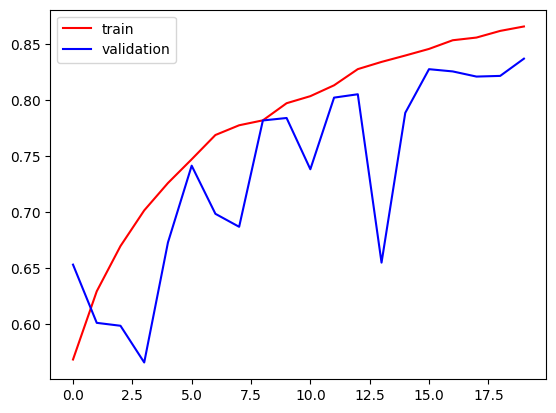

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

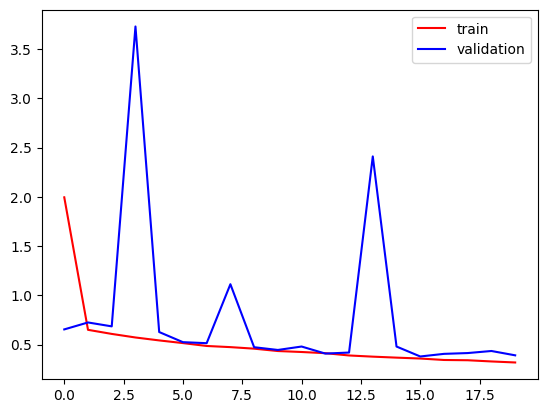

In [ ]:
plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('dog_cat.keras')

In [ ]:
model.load('dog_cat.keras')

In [ ]:
import cv2

In [ ]:
#test_img = cv2.imread('/content/dog.jpg')
test_img = cv2.imread('/content/cat.jpg')

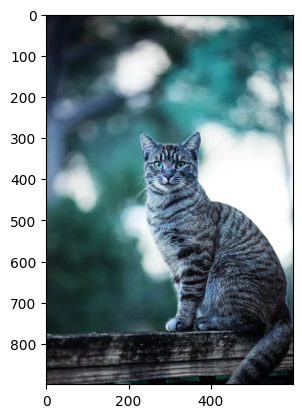

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(899, 600, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)